# Notebook for NSREC publication plots
A collections of analyses and plots for our NSREC paper. As multiple data sets are imported, I am adding caching of parsed data in for of pickle files to save some time. 

In [10]:
%load_ext autoreload
%autoreload 2
from src.data_interface import DataInterface
from src.analysis.base_tools import BaseTools
from src.analysis.ibex_coremark_tools import IbexCoremarkTools
from src.analysis.ibex_hwsec_coremark_tools import IbexHwsecCoremarkTools
from src.run_info.run_info import RunInfo

import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.special import comb
from anytree.exporter import DotExporter

def visualization_setup():
    # Interactive plots. Requires tkinter on the machine running the code
    mpl.use("TkAgg")
    # Latex formatting for plots. Some visualizations might not work without this
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["mathtext.fontset"] = "dejavuserif"

visualization_setup()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parse data sets
Only run this if data has changed. Takes a loooong time

In [11]:
# declare which data sets you want to parse in a dict, so they can be looped thru
data_sets = {
    "RV32MSingleCycle" : "src/run_info/ibex_RV32MSingleCycle_coremark.ini"
}

In [12]:
for data_set, runinfo_path in data_sets.items():
    runinfo = RunInfo(runinfo_path)
    data_interface = DataInterface(runinfo)
    golden = data_interface.golden_log
    node = data_interface.get_node_by_name("register_file_i")[0]
    root = data_interface.root
    node_data = data_interface.get_seu_log_by_node(node)
    root_data = data_interface.get_seu_log_by_node(root)
    node_runs = list(node_data.index)
    pickle_dict = {"root" : root, "node" : node, "root_data" : root_data, "node_data" : node_data, "golden" : golden}
    pickle.dump(pickle_dict, open(f"cache/{data_set}.pickle", "wb"))
    print(f"Saved {data_set}.pickle to cache.")

Parsing SEU logs...


  0%|          | 313/98243 [00:00<01:31, 1072.23it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_03-19-15.335438/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6012: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_08-06-48.143199/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6182: invalid continuation byte


  1%|          | 928/98243 [00:00<01:12, 1349.88it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_02-36-44.048116/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


  3%|▎         | 2460/98243 [00:01<01:06, 1431.27it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_03-51-55.888917/log.txt
  'utf-8' codec can't decode byte 0xcb in position 6031: invalid continuation byte


  3%|▎         | 3141/98243 [00:02<01:00, 1578.42it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_14-43-32.410247/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_15-30-21.168260/log.txt
  'utf-8' codec can't decode byte 0x85 in position 5888: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_19-06-30.695383/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6328: invalid continuation byte


  4%|▍         | 3803/98243 [00:02<01:02, 1511.78it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_11-34-13.302733/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


  6%|▌         | 5822/98243 [00:04<01:04, 1422.05it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_08-08-09.589132/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


  7%|▋         | 6844/98243 [00:05<01:21, 1121.05it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_08-31-01.909231/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 10%|▉         | 9416/98243 [00:06<01:10, 1258.69it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_18-18-54.926519/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6276: invalid continuation byte


 11%|█         | 10951/98243 [00:08<01:02, 1387.11it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_01-54-46.530763/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6181: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_15-07-30.048714/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6250: invalid continuation byte


 13%|█▎        | 12513/98243 [00:09<01:03, 1348.06it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_17-47-00.095400/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6058: invalid start byte


 14%|█▍        | 13783/98243 [00:10<00:58, 1437.97it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_07-02-09.694325/log.txt
  'utf-8' codec can't decode byte 0xe7 in position 6367: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_01-04-48.617371/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 15%|█▍        | 14406/98243 [00:10<00:58, 1421.51it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_15-36-59.596549/log.txt
  'utf-8' codec can't decode byte 0xa8 in position 5890: invalid start byte


 15%|█▌        | 15174/98243 [00:11<01:16, 1087.67it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_01-55-36.298404/log.txt
  'utf-8' codec can't decode byte 0xc1 in position 6051: invalid start byte


 16%|█▋        | 16159/98243 [00:12<01:11, 1150.49it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_00-59-37.245370/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 17%|█▋        | 16683/98243 [00:12<00:53, 1520.42it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_08-55-17.347104/log.txt
  'utf-8' codec can't decode byte 0xff in position 6219: invalid start byte


 19%|█▊        | 18241/98243 [00:13<00:51, 1540.87it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_00-37-01.584310/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6132: invalid continuation byte


 20%|█▉        | 19615/98243 [00:14<00:57, 1374.90it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_03-19-27.109106/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6705: invalid start byte


 20%|██        | 20074/98243 [00:15<01:01, 1273.14it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_12-05-50.415294/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 21%|██        | 20807/98243 [00:15<00:52, 1463.87it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_09-38-58.574537/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6230: invalid start byte


 23%|██▎       | 22852/98243 [00:17<00:56, 1344.03it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_02-20-39.072949/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6327: invalid continuation byte


 24%|██▍       | 23394/98243 [00:17<00:56, 1327.98it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_19-49-36.872923/log.txt
  'utf-8' codec can't decode byte 0xd0 in position 6177: invalid continuation byte


 25%|██▌       | 24688/98243 [00:18<00:57, 1270.53it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_17-18-11.289401/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6009: invalid start byte


 26%|██▌       | 25580/98243 [00:19<01:07, 1069.09it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_03-33-11.749171/log.txt
  'utf-8' codec can't decode byte 0xe2 in position 6466: invalid continuation byte


 26%|██▋       | 25928/98243 [00:19<00:52, 1380.15it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-28_23-51-42.260585/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6570: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_04-48-08.865881/log.txt
  'utf-8' codec can't decode byte 0x80 in position 6436: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_01-14-27.114834/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 28%|██▊       | 27631/98243 [00:21<00:56, 1244.21it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_15-57-23.375304/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6057: invalid start byte


 29%|██▊       | 28079/98243 [00:21<00:50, 1398.46it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_06-33-33.823919/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-28_23-51-49.812334/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6640: invalid continuation byte


 30%|██▉       | 29454/98243 [00:22<00:56, 1208.16it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_12-51-27.180023/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 32%|███▏      | 31025/98243 [00:23<01:00, 1116.25it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_20-47-11.570976/log.txt
  'utf-8' codec can't decode byte 0x81 in position 6769: invalid start byte


 34%|███▎      | 33031/98243 [00:25<00:49, 1310.07it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_08-07-59.530894/log.txt
  'utf-8' codec can't decode byte 0x93 in position 6056: invalid start byte


 34%|███▍      | 33487/98243 [00:25<00:45, 1413.34it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_16-54-52.537500/log.txt
  'utf-8' codec can't decode byte 0xd0 in position 6436: invalid continuation byte


 34%|███▍      | 33791/98243 [00:25<00:51, 1256.55it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_14-38-16.697962/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6380: invalid continuation byte


 36%|███▌      | 35152/98243 [00:26<00:43, 1463.42it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_07-03-27.331466/log.txt
  'utf-8' codec can't decode byte 0xa0 in position 5945: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_21-56-30.414078/log.txt
  'utf-8' codec can't decode byte 0x92 in position 6033: invalid start byte


 36%|███▌      | 35577/98243 [00:27<00:47, 1330.12it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_03-10-43.784866/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6055: invalid start byte


 37%|███▋      | 36359/98243 [00:27<00:40, 1523.50it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_01-03-31.885889/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 5889: invalid start byte


 37%|███▋      | 36802/98243 [00:28<00:43, 1405.07it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_18-14-07.778458/log.txt
  'utf-8' codec can't decode byte 0x81 in position 6765: invalid start byte


 38%|███▊      | 37796/98243 [00:28<00:42, 1411.21it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_23-15-51.123420/log.txt
  'utf-8' codec can't decode byte 0xfc in position 6550: invalid start byte


 39%|███▉      | 38076/98243 [00:29<00:45, 1319.55it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_00-05-09.522099/log.txt
  'utf-8' codec can't decode byte 0xff in position 6311: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_19-22-48.209727/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 40%|███▉      | 38948/98243 [00:29<00:45, 1292.60it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_03-16-02.150609/log.txt
  'utf-8' codec can't decode byte 0xb7 in position 6205: invalid start byte


 41%|████      | 39801/98243 [00:30<00:52, 1123.68it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_07-52-20.495288/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_14-49-03.755382/log.txt
  'utf-8' codec can't decode byte 0xf2 in position 6337: invalid continuation byte


 41%|████      | 40312/98243 [00:30<00:53, 1081.06it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_10-37-18.809658/log.txt
  'utf-8' codec can't decode byte 0x82 in position 5973: invalid start byte


 41%|████▏     | 40709/98243 [00:31<00:50, 1139.41it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_02-04-28.962234/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6275: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_05-57-48.170331/log.txt
  'utf-8' codec can't decode byte 0xd0 in position 6731: invalid continuation byte


 42%|████▏     | 41133/98243 [00:31<00:49, 1148.21it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_10-14-41.766290/log.txt
  'utf-8' codec can't decode byte 0xf2 in position 6477: invalid continuation byte


 42%|████▏     | 41399/98243 [00:31<00:46, 1231.43it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_17-35-19.135700/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6314: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_05-32-15.832576/log.txt
  'utf-8' codec can't decode byte 0xfa in position 6367: invalid start byte


 42%|████▏     | 41640/98243 [00:32<00:56, 1004.56it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_06-17-56.918953/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6012: invalid continuation byte


 43%|████▎     | 42466/98243 [00:32<00:44, 1241.10it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_16-21-07.544532/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6161: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_00-22-29.967654/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6379: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_02-57-19.351813/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6250: invalid continuation byte


 45%|████▍     | 44145/98243 [00:34<00:41, 1305.12it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_08-01-43.788624/log.txt
  'utf-8' codec can't decode byte 0xb7 in position 6565: invalid start byte


 46%|████▌     | 44773/98243 [00:34<00:35, 1516.07it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_09-49-45.609646/log.txt
  'utf-8' codec can't decode byte 0xc0 in position 6007: invalid start byte


 47%|████▋     | 45895/98243 [00:35<00:35, 1475.12it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_18-02-51.756018/log.txt
  'utf-8' codec can't decode byte 0x8c in position 6032: invalid start byte


 49%|████▉     | 48264/98243 [00:37<00:36, 1372.03it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_07-08-34.516210/log.txt
  'utf-8' codec can't decode byte 0xe8 in position 6205: invalid continuation byte


 50%|█████     | 49329/98243 [00:38<00:45, 1070.37it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_07-21-09.782956/log.txt
  'utf-8' codec can't decode byte 0x93 in position 6007: invalid start byte


 53%|█████▎    | 52026/98243 [00:40<00:28, 1630.40it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_09-43-20.274953/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6714: invalid start byte


 56%|█████▌    | 54600/98243 [00:42<00:35, 1229.08it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_14-55-49.397118/log.txt
  'utf-8' codec can't decode byte 0xe8 in position 6206: invalid continuation byte


 57%|█████▋    | 56093/98243 [00:42<00:26, 1617.03it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_14-22-16.616353/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 58%|█████▊    | 56566/98243 [00:43<00:32, 1288.79it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_11-05-20.904326/log.txt
  'utf-8' codec can't decode byte 0x8b in position 6479: invalid start byte


 58%|█████▊    | 57013/98243 [00:43<00:32, 1279.91it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_07-11-05.282354/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 58%|█████▊    | 57282/98243 [00:43<00:34, 1203.06it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_11-10-09.987545/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6058: invalid start byte


 60%|██████    | 58959/98243 [00:45<00:32, 1215.92it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_05-32-40.922160/log.txt
  'utf-8' codec can't decode byte 0x80 in position 6653: invalid start byte


 61%|██████▏   | 60254/98243 [00:46<00:24, 1522.04it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_23-47-29.865127/log.txt
  'utf-8' codec can't decode byte 0x91 in position 6355: invalid start byte


 64%|██████▎   | 62478/98243 [00:47<00:21, 1695.32it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_23-09-06.837534/log.txt
  'utf-8' codec can't decode byte 0xd0 in position 6604: invalid continuation byte


 64%|██████▍   | 62804/98243 [00:48<00:29, 1206.75it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_04-00-45.120428/log.txt
  'utf-8' codec can't decode byte 0x86 in position 6358: invalid start byte


 66%|██████▌   | 64352/98243 [00:49<00:27, 1230.97it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_03-28-48.477860/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 66%|██████▌   | 64853/98243 [00:49<00:23, 1419.14it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_21-27-04.023793/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 67%|██████▋   | 65356/98243 [00:49<00:22, 1483.97it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_11-36-30.005452/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6078: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_10-46-05.367982/log.txt
  'utf-8' codec can't decode byte 0x8e in position 6559: invalid start byte


 68%|██████▊   | 66404/98243 [00:50<00:23, 1344.37it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_20-14-28.033966/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6380: invalid continuation byte


 68%|██████▊   | 66858/98243 [00:54<02:41, 194.25it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_21-59-47.126167/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6380: invalid continuation byte


 69%|██████▉   | 68177/98243 [00:55<00:28, 1069.49it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_10-48-39.530825/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 70%|███████   | 68974/98243 [00:55<00:22, 1304.66it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_06-23-19.326866/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 71%|███████   | 69646/98243 [00:56<00:21, 1344.65it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_02-24-42.392532/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 72%|███████▏  | 70494/98243 [00:56<00:21, 1299.56it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_22-07-11.285056/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 72%|███████▏  | 70986/98243 [00:57<00:18, 1447.92it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_16-00-14.025112/log.txt
  'utf-8' codec can't decode byte 0x93 in position 5951: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_00-08-20.210331/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6691: invalid start byte


 73%|███████▎  | 72100/98243 [00:58<00:18, 1433.92it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_23-40-54.849418/log.txt
  'utf-8' codec can't decode byte 0xfc in position 6450: invalid start byte


 75%|███████▍  | 73379/98243 [00:59<00:18, 1326.25it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_22-32-11.407669/log.txt
  'utf-8' codec can't decode byte 0x80 in position 6050: invalid start byte


 76%|███████▌  | 74757/98243 [01:00<00:17, 1371.66it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_02-30-26.524669/log.txt
  'utf-8' codec can't decode byte 0x80 in position 6472: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_07-21-51.262211/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 78%|███████▊  | 76300/98243 [01:01<00:13, 1603.82it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_17-44-03.786463/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 79%|███████▊  | 77181/98243 [01:01<00:12, 1701.72it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_06-51-40.129470/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 79%|███████▉  | 77878/98243 [01:02<00:13, 1471.03it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_00-54-10.064428/log.txt
  'utf-8' codec can't decode byte 0xc4 in position 6603: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_17-25-40.778247/log.txt
  'utf-8' codec can't decode byte 0xe0 in position 6033: invalid continuation byte


 80%|███████▉  | 78589/98243 [01:02<00:11, 1712.08it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_17-47-51.669054/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6571: invalid continuation byte


 81%|████████  | 79445/98243 [01:03<00:12, 1527.13it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_03-30-04.111728/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6161: invalid continuation byte


 81%|████████  | 79773/98243 [01:03<00:13, 1344.55it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_15-24-14.874080/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 82%|████████▏ | 81020/98243 [01:04<00:13, 1298.25it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_23-58-05.943748/log.txt
  'utf-8' codec can't decode byte 0xd6 in position 6199: invalid continuation byte


 83%|████████▎ | 81744/98243 [01:04<00:09, 1665.79it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_03-35-54.079709/log.txt
  'utf-8' codec can't decode byte 0x93 in position 6507: invalid start byte


 85%|████████▍ | 83301/98243 [01:05<00:09, 1601.26it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_14-29-23.259524/log.txt
  'utf-8' codec can't decode byte 0x91 in position 6355: invalid start byte


 86%|████████▌ | 84332/98243 [01:06<00:09, 1492.73it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_19-09-14.912131/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6613: invalid continuation byte


 86%|████████▋ | 84850/98243 [01:06<00:08, 1514.31it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_18-24-47.650015/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6700: invalid start byte


 87%|████████▋ | 85706/98243 [01:07<00:07, 1611.02it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_00-32-23.938217/log.txt
  'utf-8' codec can't decode byte 0x85 in position 6006: invalid start byte


 88%|████████▊ | 86939/98243 [01:08<00:06, 1723.03it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_20-30-37.037594/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 90%|████████▉ | 88129/98243 [01:08<00:06, 1487.60it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_05-43-40.267103/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6482: invalid continuation byte


 91%|█████████ | 89318/98243 [01:09<00:05, 1511.94it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_01-34-14.793470/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6380: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_05-06-48.042940/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6231: invalid start byte


 91%|█████████ | 89636/98243 [01:10<00:06, 1288.98it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_19-31-08.700651/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 92%|█████████▏| 90314/98243 [01:10<00:05, 1329.77it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_15-28-11.349400/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6686: invalid continuation byte


 95%|█████████▍| 93323/98243 [01:13<00:05, 908.00it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_22-09-15.774796/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6715: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_04-55-24.484701/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6571: invalid continuation byte


 99%|█████████▊| 96926/98243 [01:15<00:00, 1441.59it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_09-16-32.254028/log.txt
  'utf-8' codec can't decode byte 0xc8 in position 6125: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_22-50-20.859533/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6379: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_07-09-38.258987/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_08-58-02.524412/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


100%|█████████▉| 98024/98243 [01:16<00:00, 1440.51it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_13-11-09.982644/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


100%|██████████| 98243/98243 [01:16<00:00, 1278.76it/s]


  Parsed 94587 logs, percent failed reads: 0.12%
Done parsing SEU logs
Building register tree
  68.94% of the register tree is unpopulated
Built register tree
Saved RV32MSingleCycle.picle to cache.


## Load Cached Data

In [ ]:
RV32MSingleCycle = pickle.load(open("cache/RV32MSingleCycle.pickle", "rb"))

root = RV32MSingleCycle["root"]
node = RV32MSingleCycle["node"]
root_data = RV32MSingleCycle["root_data"]
node_data = RV32MSingleCycle["node_data"]
golden = RV32MSingleCycle["golden"]


In [25]:
print(f"Number of entries on node_data: {len(node_data)}")
print(f"Number of entries on root_data: {len(root_data)}")

node_data.head()

Number of entries on node_data: 32213
Number of entries on root_data: 94587


,register,register_delimiter,injection_cycle,bit_number,value_before,value_after,uvm_seed,seed_crc,list_crc,matrix_crc,state_crc,final_crc
seu_2023-12-30_17-28-18.265941,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,390656,7,8203f868,8203f8e8,84702572[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-12-16_21-07-58.165943,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,45916,28,00000030,10000030,2109266481[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-12-17_22-14-35.838746,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,65209.5,16,00000001,00010001,715275877[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-12-17_20-41-58.444854,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,40907.5,9,00000001,00000201,1531173778[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-12-17_06-02-16.545382,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,419817,12,00006180,00007180,1517452793[0m,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714


/home/anvesh/projects/Ibex-Analysis/src/analysis/base_tools.py:266: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  
/home/anvesh/projects/Ibex-Analysis/src/analysis/base_tools.py:214: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  
/home/anvesh/projects/Ibex-Analysis/src/analysis/base_tools.py:266: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  


ConversionError: Failed to convert value(s) to axis units: ['rf_reg[31]', 'rf_reg[30]', 'rf_reg[29]', 'rf_reg[28]', 'rf_reg[27]', 'rf_reg[26]', 'rf_reg[25]', 'rf_reg[24]', 'rf_reg[23]', 'rf_reg[22]', 'rf_reg[21]', 'rf_reg[20]', 'rf_reg[19]', 'rf_reg[18]', 'rf_reg[17]', 'rf_reg[16]', 'rf_reg[15]', 'rf_reg[14]', 'rf_reg[13]', 'rf_reg[12]', 'rf_reg[11]', 'rf_reg[10]', 'rf_reg[9]', 'rf_reg[8]', 'rf_reg[7]', 'rf_reg[6]', 'rf_reg[5]', 'rf_reg[4]', 'rf_reg[3]', 'rf_reg[2]', 'rf_reg[1]', 'rf_reg[0]']

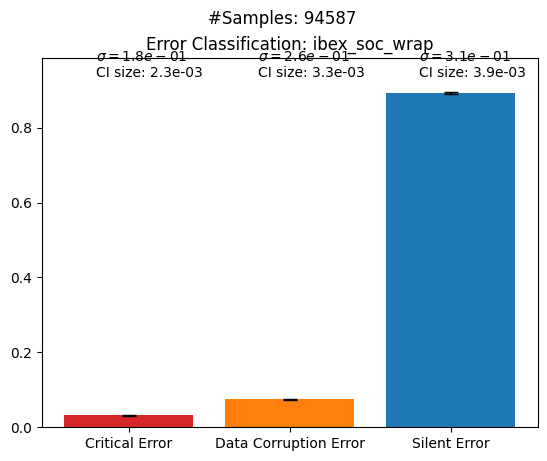

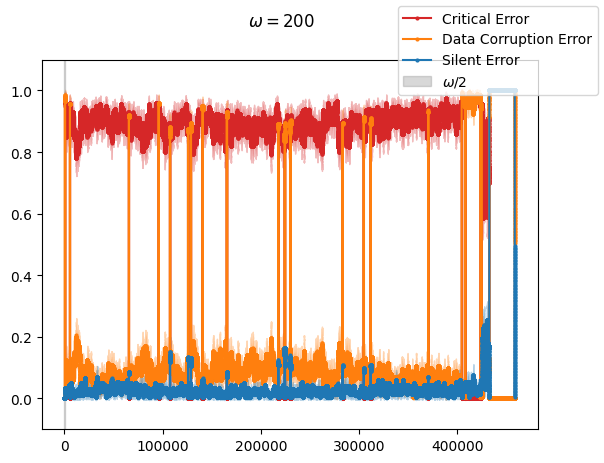

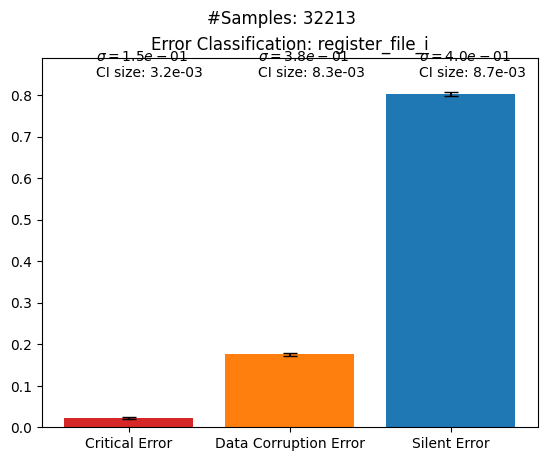

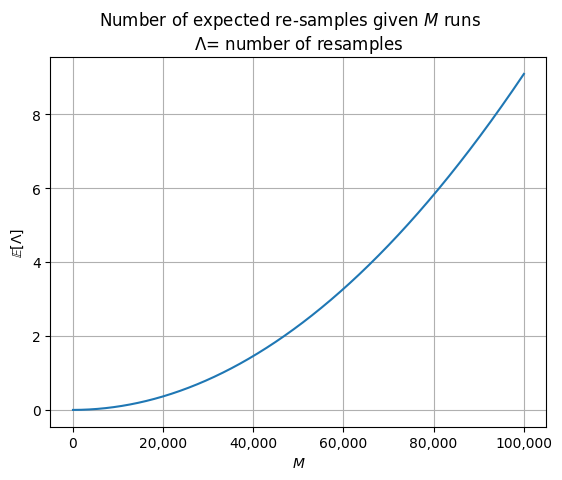

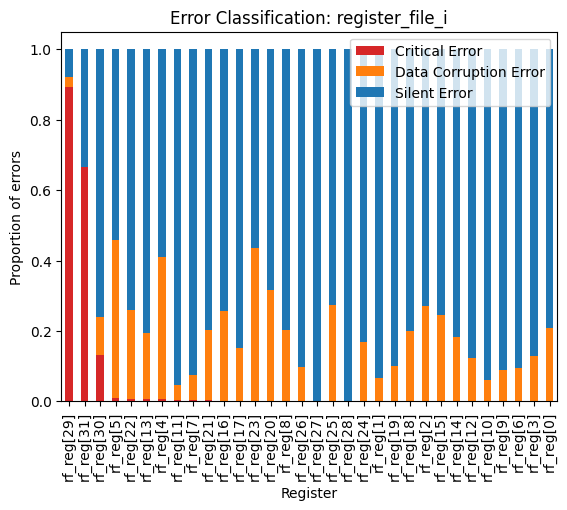

In [32]:
node_runs = list(node_data.index)

_ = BaseTools.error_classification_confidence(data_interface, root, visualize=True)

_ = BaseTools.windowed_error_rate(
    data_interface, root, "injection_cycle", visualize=True, window_size=200
)
_ = BaseTools.error_classification_confidence(data_interface, node, visualize=True)
_ = BaseTools.expected_num_multi_injection_runs(
    500_000, 2200, [100, 100_000], visualize=True
)


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_coremark_tools.py:73: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  


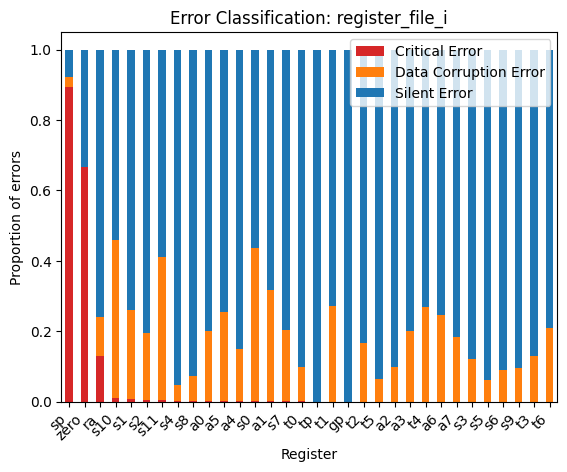

In [36]:
node = data_interface.get_node_by_name("register_file_i")[0]
node.children
_, fig = IbexCoremarkTools.stacked_register_error_class(
    data_interface, node, visualize=True
)
